## Vehicle Detection Project (Project 5)
Udacity Self-car driving Nanodegree
Kwanghyun JUNG
11 FEB 2017
ihangulo@gmail.com

## Cell 1 : Image Utility


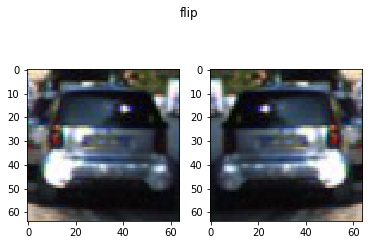

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import random
import time


def make_image_flip(img):
    flipped_image = np.fliplr(img)
    return flipped_image

# get copped image from coordinates
def crop_image(img, coord) :
    return img[coord[1]:coord[3], \
                         coord[0]:coord[2]]

random.seed(int(time.time()))
image = mpimg.imread('data/vehicles_smallset/cars1/4.jpeg')

## flip
fig= plt.figure()
a=fig.add_subplot(1,2,1)
plt.imshow(image)
b=fig.add_subplot(1,2,2)
plt.imshow(make_image_flip(image))
fig.suptitle("flip")
plt.show()


## Cell 2 : Make more Non-car data from Image

In [4]:
# make data from stills
import random
import time
import cv2



def get_cut_rect(startx, starty, width) :
    x = startx
    y = starty
    xx = startx + width
    yy = starty + width
    return [x,y,xx,yy] # xmin, ymin, xmax, ymax



# get random image     
def get_random_image(image) :
    still_width = random.randint(64, 512)
    rect_x = random.randint(0,1215)

    if(rect_x+still_width>1279) :# if out of range
        rect_x = 1279- still_width
        still_width = rect_x
    
    rect_y = random.randint(300,600)

    if(rect_y+still_width > 655) :
        rect_y= 655 - still_width
    
    
    return crop_image(car_image, get_cut_rect(rect_x, rect_y, still_width) ) 
    
    
random.seed(int(time.time()))


video_num = 0
video_output_folder = 'data/from_test_data/video'
def extract_notcar_image(image) :
    global video_num
    global video_output_folder
    
    for j in range(20) : # get 20 pictures from video frame
        car_crop_img = get_random_image(image)
        # car_crop_img = crop_image(car_image, get_cut_rect(rect_x, rect_y, still_width) )   
        if(len(car_crop_img)>0) :
            resized= cv2.resize(car_crop_img, (64, 64))
            video_num += 1
            output_car_fname="video_{:06d}".format(video_num)
            img2 = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
            cv2.imwrite(video_output_folder+ '/'+ output_car_fname + '.jpg', img2) # write it to file
    return image
    
    
fnames = glob.glob('test_images/*.jpg')  # test images

output_folder= 'data/from_test_data/all'
i = 0
for fname in fnames :
    print(fname)
    car_image =  mpimg.imread(fname)
    
    for j in range(50) :
        car_crop_img = get_random_image(car_image)
        if(len(car_crop_img)>0) :
            resized= cv2.resize(car_crop_img, (64, 64))
            plt.figure()
            plt.imshow(resized)
            i=i+1
            output_car_fname="{:06d}_".format(i)
            if(i % 100 ==0) :
                print('CAR #', i, end=' ')
            img2 = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
            cv2.imwrite(output_folder+ '/'+ output_car_fname + '.jpg', img2) # write it to file
 
print("done")

test_images/test1.jpg


/Users/user02/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


test_images/test2.jpg
CAR # 100 test_images/test3.jpg
test_images/test4.jpg
CAR # 200 test_images/test5.jpg
test_images/test6.jpg
CAR # 300 done


## Cell 3 : Make more Non-car data from Project Video
After making images and delete all images which car included manualy

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'project_video_dummy.mp4'
clip1 = VideoFileClip("project_video.mp4")
#global_mtx, global_dist = read_camera_calibration_from_file() #  Do camera calibration given object points and image points


white_clip = clip1.fl_image(extract_notcar_image) 
%time white_clip.write_videofile(white_output, audio=False)

#Play the video inline, or if you prefer find the video in your filesystem 
#(should be in the same directory) and play it in your video player of choice.
HTML("""make_image_flip
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Cell 4 : Make more Non-cars data using flip

In [ ]:
output_folder= 'data/from_test_data/notcars_flip'
i = 0
fnames = glob.glob('data/non-vehicles_smallset/*/'+ '*.*') # not cars

    
for fname in fnames :
    not_car_image =  mpimg.imread(fname)
    flipped = make_image_flip(not_car_image)
    
    cv2.imwrite(output_folder+ '/'+ fname.split('/')[3],cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB) ) # write it to file
  
 
print("done")

## Cell 5 : Load all data

In [233]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

cars = []
notcars = []

# Read in our vehicles and non-vehicles
images = glob.glob('data/vehicles_smallset/*/'+ '*.*')  # cars
for image in images :
    cars.append(image)

    

images3 = glob.glob('data/non-vehicles_smallset/*/'+ '*.*') # not cars 
                        # include all flipped image and captured from image and video
for image in images3 :
    notcars.append(image)


# http://www.gti.ssr.upm.es/data/Vehicle_database.html
# GTI data
images_gti = glob.glob('data/GTI_vehicles/*/'+ '*.png') # not cars
for image in images_gti :
    cars.append(image)
    

print ('# of cars :', len(cars), '# of noncars', len(notcars))

# of cars : 10000 # of noncars 9212


## Cell 6 : Data Exploration
First, we see the data structures.

Your function returned a count of 9998  cars and 9212  non-cars
of size:  (64, 64, 3)  and data type: uint8
car_image  data/GTI_vehicles/KITTI_extracted/3965.png 7324 (64, 64, 3)
end


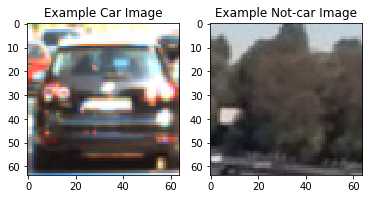

In [229]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob



def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict


data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
print('car_image ', cars[car_ind] ,car_ind, car_image.shape)

notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
#plt.imshow(notcar_crop_img)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')


print ("end")

## Cell 7 : Hog features (For testing)

data/GTI_vehicles/KITTI_extracted/2017.png


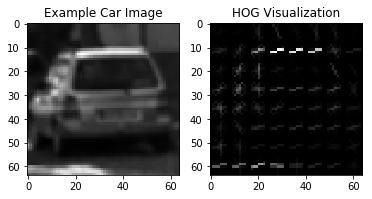

In [4]:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/d479f43a-7bbb-4de7-9452-f6b991ece599
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog


# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2    
    
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # change to gray image



# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
print(cars[ind])

fig = plt.figure()
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

## Cell 8 : Combine and Normalize Features (For testing)
HLS , Hog Channel : 1 


start!
end!


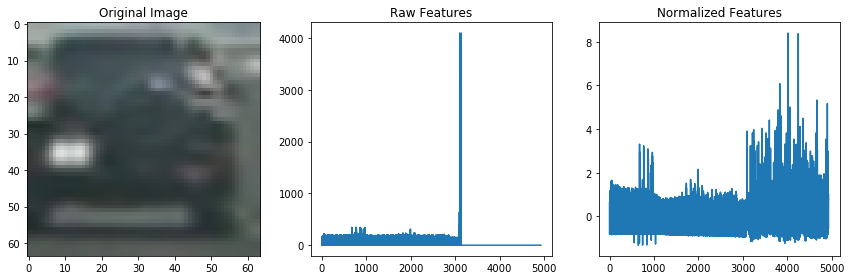

In [147]:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/cacf86d7-f8eb-46bd-9f09-34a2ff208ce8
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob


# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True, demo=False):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for ind, file in enumerate(imgs):
        file_features = []
#         if(ind%100==0):
#             #print ('index=', ind , end=' ')
#             print ('#', end='')
        # Read in each one by one
        image = mpimg.imread(file)
        
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
            
#             plt.figure()
#             plt.plot(spatial_features)
#             plt.show()

        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
#             plt.figure()
#             plt.plot(hist_features)
#             plt.show()
        
            
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Parameters
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 1 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

print ("start!")

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat,
                        
                               )
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat,
                                
                                  )
    
    
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')
    
print ("end!")

## Cell 9 : Testing color models


RGB
HSV
HLS
YUV
YCrCb
RGB
HSV
HLS
YUV
YCrCb


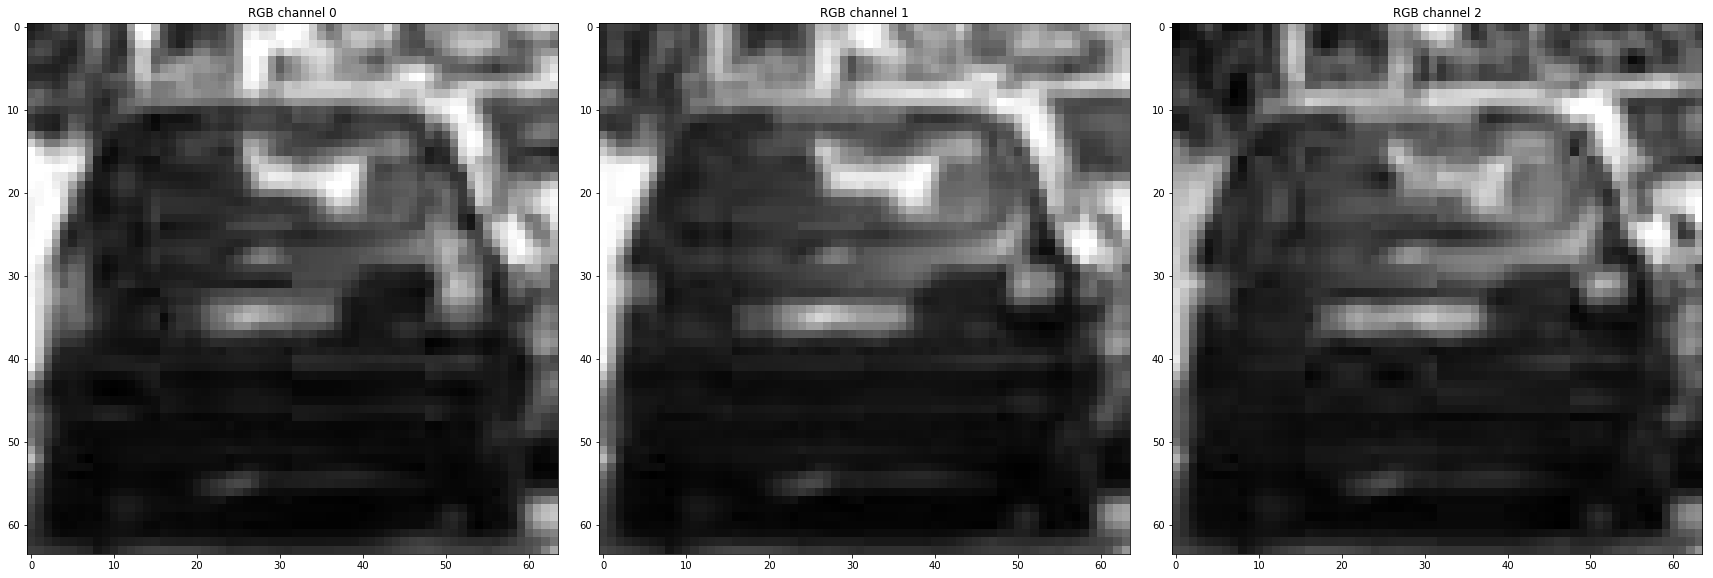

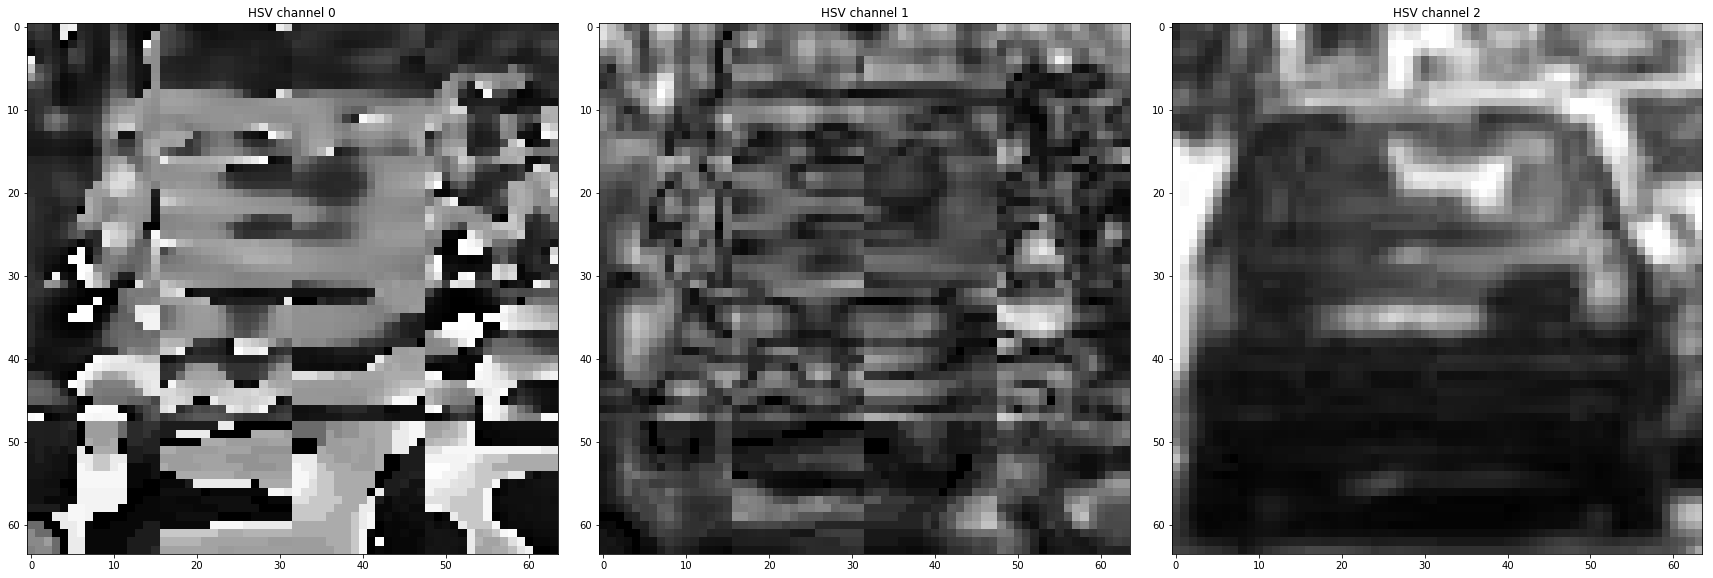

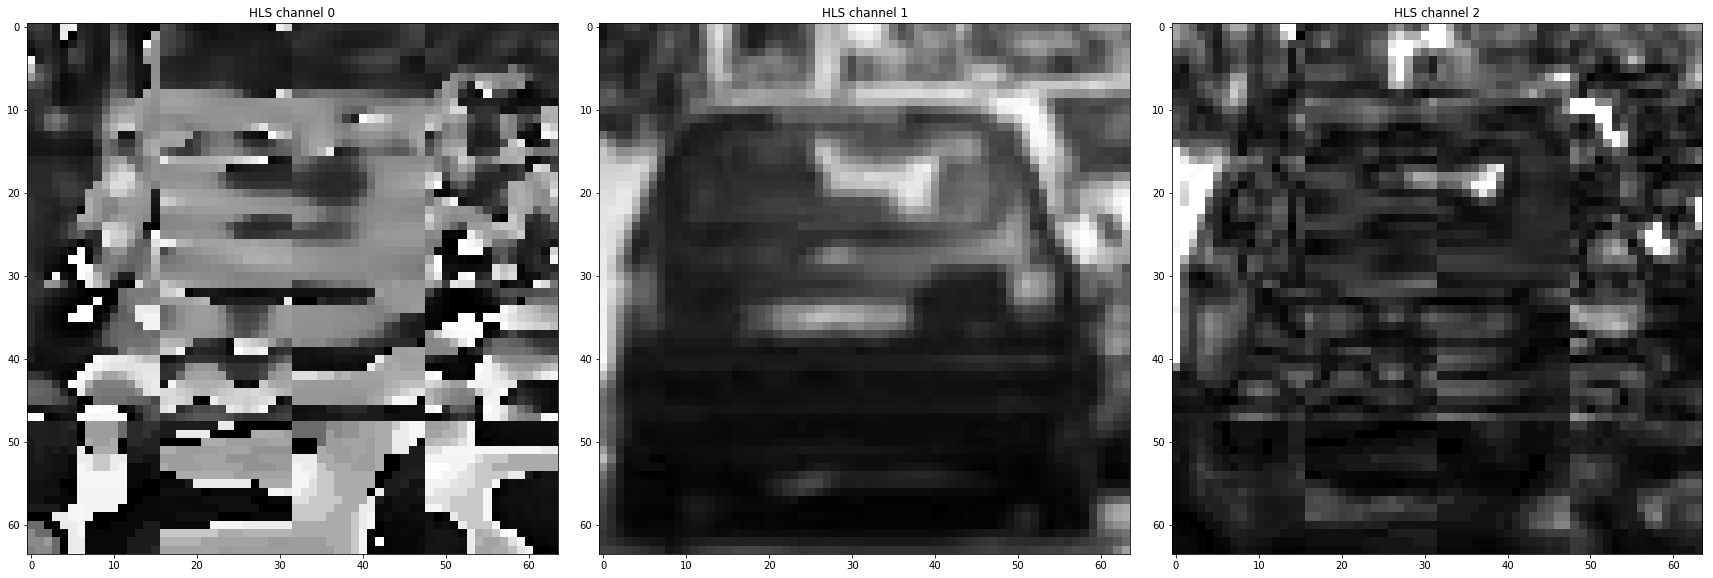

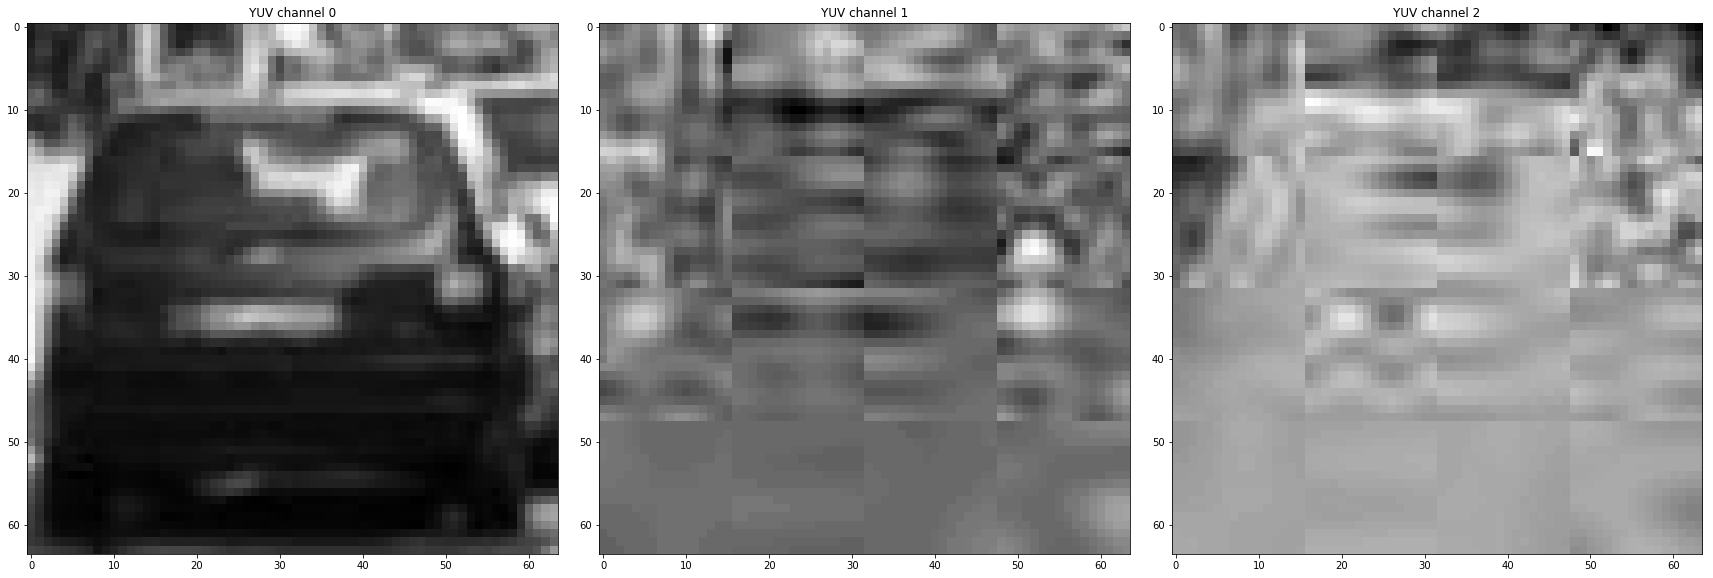

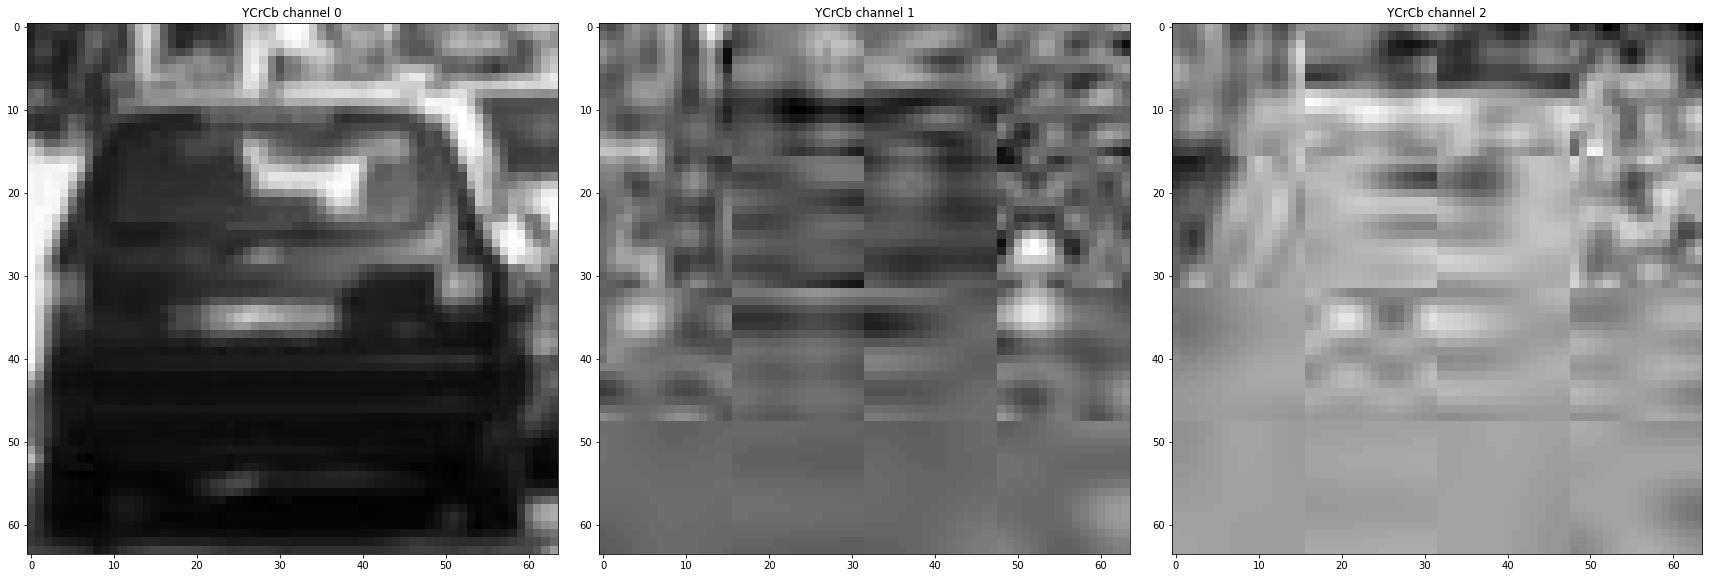

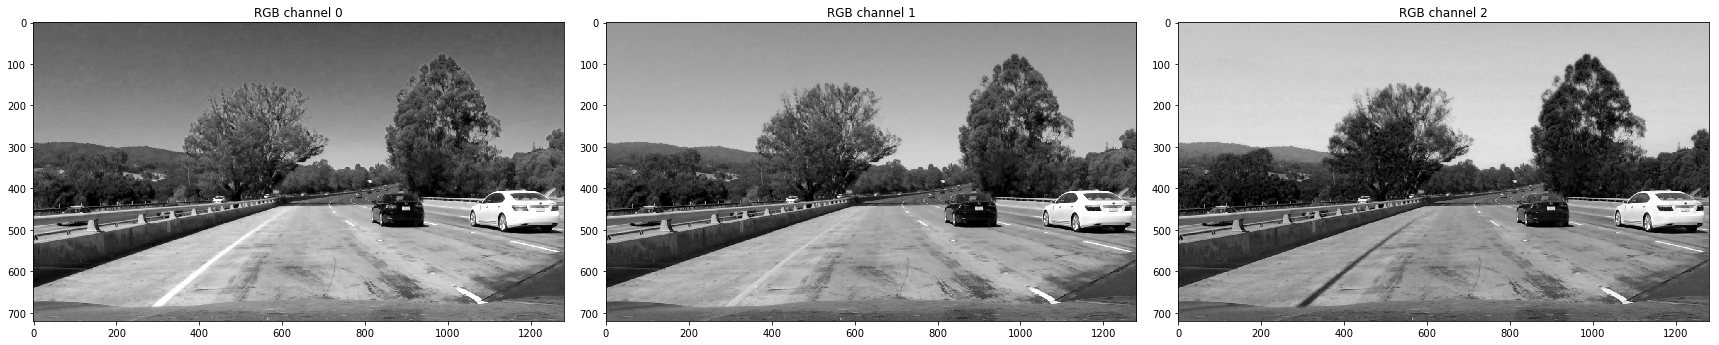

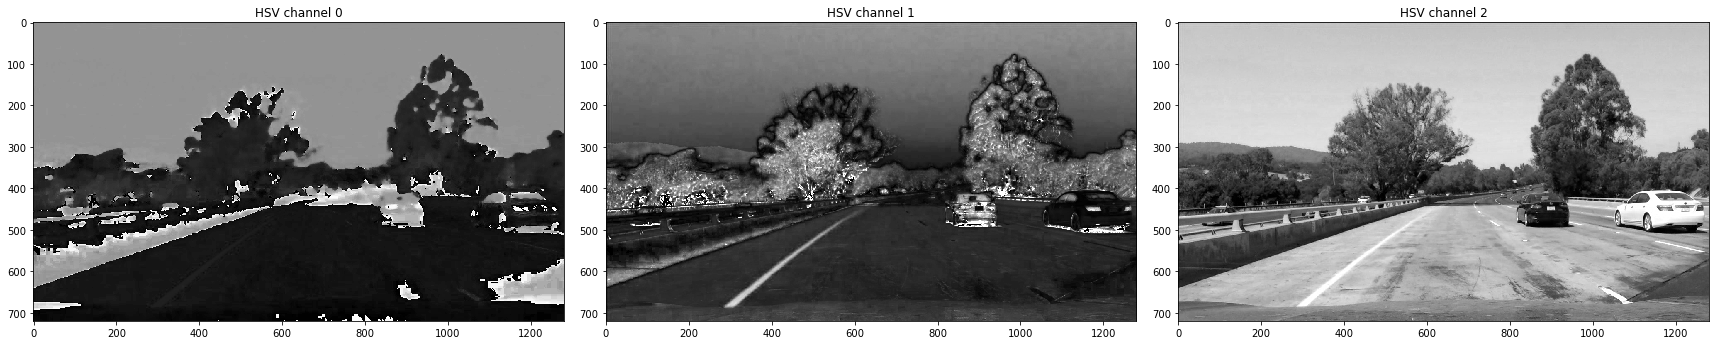

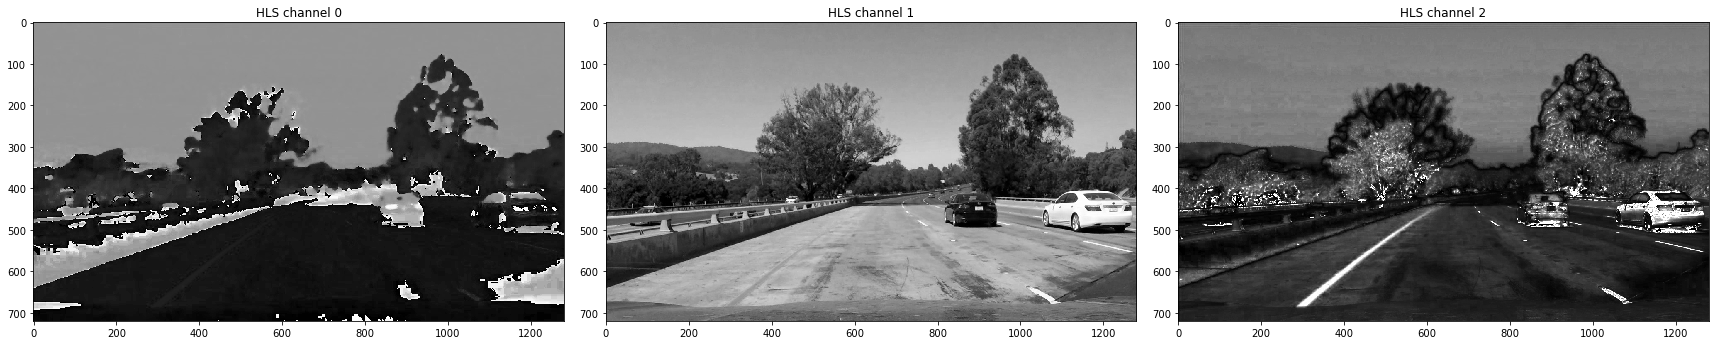

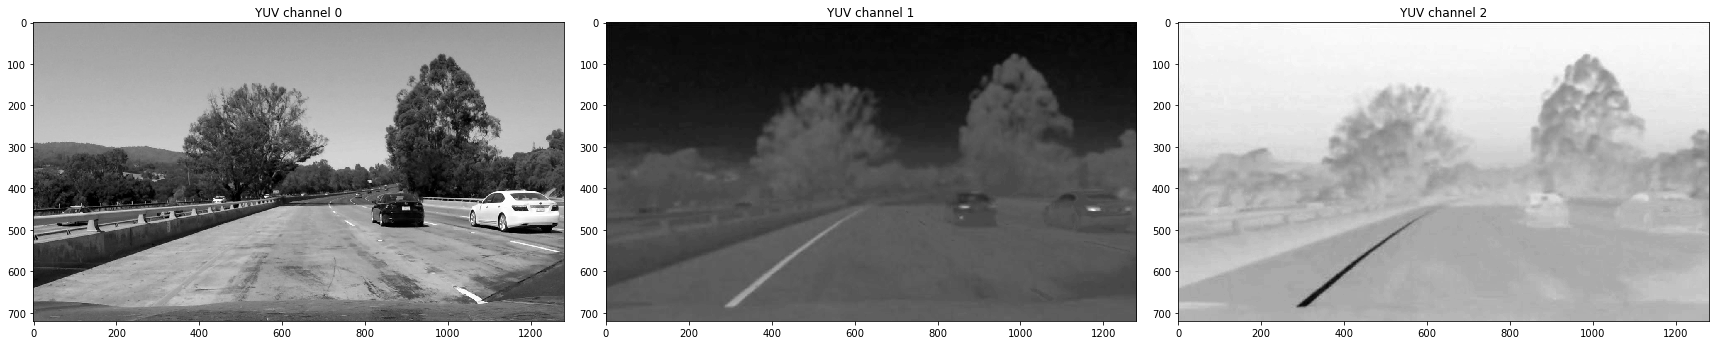

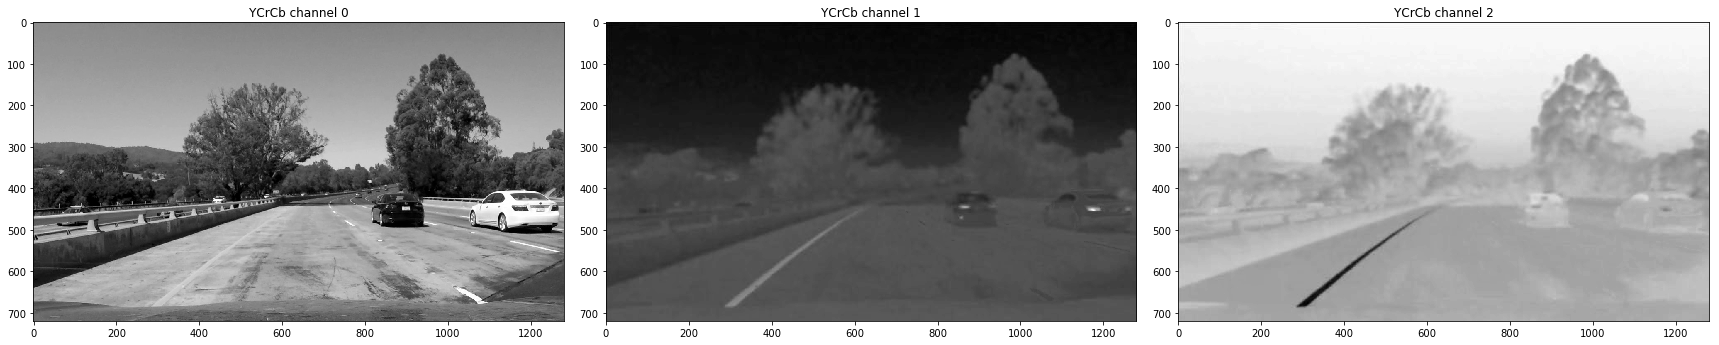

In [99]:
def show_images_color(image, color_space):
    
    f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    print(color_space)
    if color_space != 'RGB':
        if color_space == 'HSV':
              feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)
            
    channel0 = feature_image[:,:,0]
    channel1 = feature_image[:,:,1]
    channel2 = feature_image[:,:,2]
    

    ax1.imshow(channel0,cmap='gray')
    ax1.set_title(color_space+' channel 0')
    ax2.imshow(channel1,cmap='gray')
    ax2.set_title(color_space+' channel 1')
    ax3.imshow(channel2,cmap='gray')
    ax3.set_title(color_space+' channel 2')
   
   
   

image = mpimg.imread('data/vehicles_smallset/cars1/71.jpeg')
for colorspace in ['RGB', 'HSV', 'HLS', 'YUV', 'YCrCb'] :
    show_images_color(image,colorspace)
    
image = mpimg.imread('test_images/test1.jpg')
for colorspace in ['RGB', 'HSV', 'HLS', 'YUV', 'YCrCb'] :
    show_images_color(image,colorspace)

Images which can be shown as grayscaled image is "HSV Channel 2" "HLS Channel 1"  "YUV channel 0 " YCrCb channel 0"

In [ ]:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/7355e459-55d0-4f2d-923c-4810c4360267
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split # >=0.18

print ('start!')
for colorspace in ['RGB', 'HSV', 'HLS', 'YUV', 'YCrCb'] :
    for color_channel in range(3) :
       
        t=time.time()
        car_features = extract_features(cars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
        notcar_features = extract_features(notcars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
        t2 = time.time()
        #print(round(t2-t, 2), 'Seconds to extract HOG features...')
        # Create an array stack of feature vectors
        X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
        # Fit a per-column scaler
        X_scaler = StandardScaler().fit(X)
        # Apply the scaler to X
        scaled_X = X_scaler.transform(X)

        # Define the labels vector
        y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    
        # Split up data into randomized training and test sets
        rand_state = np.random.randint(0, 100)
        X_train, X_test, y_train, y_test = train_test_split(\
            scaled_X, y, test_size=0.2, random_state=rand_state)
    
        # check the train-test set is effective

        #print('Using:',orient,'orientations',pix_per_cell,
        #'pixels per cell and', cell_per_block,'cells per block')
        #print('Feature vector length:', len(X_train[0]))
        # Use a linear SVC 
        svc = LinearSVC()
        # Check the training time for the SVC
        t=time.time()
        svc.fit(X_train, y_train)
        t2 = time.time()
        #print(round(t2-t, 2), 'Seconds to train SVC...')
        # Check the score of the SVC
        print('#### color space =', colorspace, 'channel=',color_channel)
        print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
        # Check the prediction time for a single sample
        t=time.time()
        n_predict = 100
    
        predicts= svc.predict(X_test[0:n_predict]) 
        y_test_set = y_test[0:n_predict]
    
        
        #print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
        #print('For these',n_predict, 'labels: ', y_test[0:n_predict])
        
        t2 = time.time()
        #print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
    
print('done')

start!
#### color space = RGB channel= 0
Test Accuracy of SVC =  0.9966
#### color space = RGB channel= 1
Test Accuracy of SVC =  0.9951
#### color space = RGB channel= 2
Test Accuracy of SVC =  0.9966
#### color space = HSV channel= 0
Test Accuracy of SVC =  0.9966
#### color space = HSV channel= 1
Test Accuracy of SVC =  0.9977
#### color space = HSV channel= 2
Test Accuracy of SVC =  0.9987
#### color space = HLS channel= 0
Test Accuracy of SVC =  0.9982
#### color space = HLS channel= 1
Test Accuracy of SVC =  0.9982
#### color space = HLS channel= 2
Test Accuracy of SVC =  0.9974
#### color space = YUV channel= 0
Test Accuracy of SVC =  0.999
#### color space = YUV channel= 1
Test Accuracy of SVC =  0.9987


#### After multiple try, I select "HLS colorspace, hog channel 1"

## Cell 10 : Sliding window

['test_images/test1.jpg', 'test_images/test2.jpg', 'test_images/test3.jpg', 'test_images/test4.jpg', 'test_images/test5.jpg', 'test_images/test6.jpg', 'test_images/test_hangulo1.jpg']
test_images/test1.jpg
test_images/test2.jpg
test_images/test3.jpg
test_images/test4.jpg
test_images/test5.jpg
test_images/test6.jpg
test_images/test_hangulo1.jpg


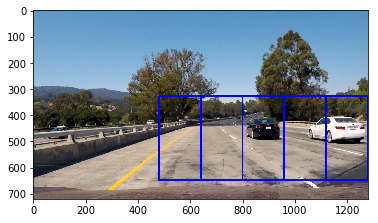

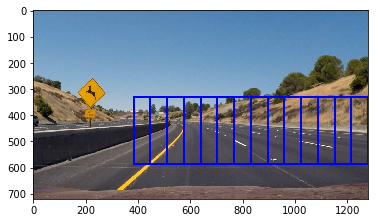

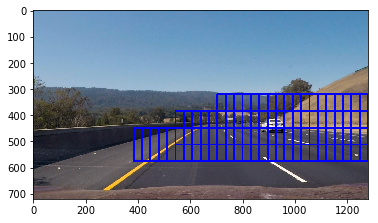

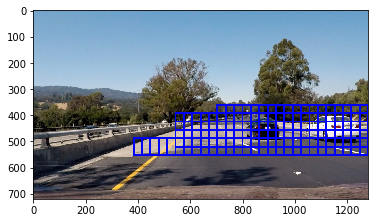

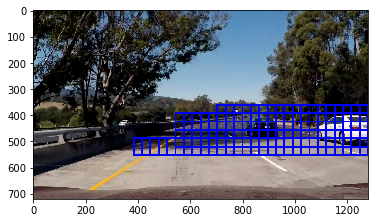

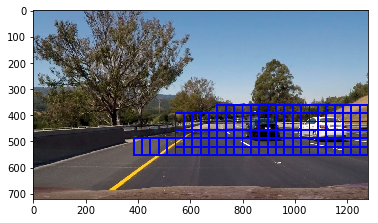

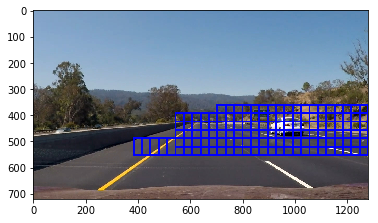

In [242]:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/8e39c07e-afd5-4ba5-9204-8b44aa39285c
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#image = mpimg.imread('test_images/test2.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


def get_x_start_from_y (yy) :
    global X_starts
    if(yy<450) :
        return X_starts[0]
    if(yy < 550) :
        return X_starts[1]
    if(yy < 630) :
        return X_starts[2]
   
    return X_starts[3]
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0] 
   
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
#     print('window size =', xy_window[0], ' nx_pix_per_step ', nx_pix_per_step , 'ny_pix_per_step', ny_pix_per_step)
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    
#     print('nx_windows=', nx_windows, 'ny_windows=', ny_windows)
    # Initialize a list to append window positions to
    window_list = []

    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            #print("starty xy_window endy / getx",starty,xy_window[1],endy)
            # check if out of screen
            if(endx <= x_start_stop[1]
               and startx > get_x_start_from_y(endy) # using my predefind xs
               and endy<= y_start_stop[1]  ) :
            
                # Append window position to list
                window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


## IMPORTANT!!!
## ----------------------------------------------------
## Define global variables (using all this project)
## ----------------------------------------------------
xy_windows = [(320,320), (256,256) , (128,128), (64,64) ] #, (48,48)]
xy_overlaps = [(0.5,0.5), (0.75, 0.5), (0.75,0.5),(0.5,0.5)]# , (0.25,0.25)]
y_start_stops = [ [328, 679] , [330, 600],[320, 600],[360,580]]#,[360, 500]]#, [360,655]]
x_start_stops = [320, None]
X_starts= (676, 515, 383,320) # 168) # from 400, 500, 600, 700

 
#
# TESTING
#
fnames = glob.glob('test_images/*.jpg')  # test images
print(fnames)
kk=0
for fname in fnames :
    print(fname)
    image =  mpimg.imread(fname)
   
   
    #for xy_window, xy_overlap, y_start_stop in zip (xy_windows, xy_overlaps, y_start_stops) :
        
    windows = slide_window(image, x_start_stop=x_start_stops, y_start_stop= y_start_stops[kk], 
                        xy_window=xy_windows[kk], xy_overlap=xy_overlaps[kk])    
    window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)  
    
    kk += 1
    if(kk>=len(xy_windows)) :
        kk=len(xy_windows)-1
    
    plt.figure()
    plt.imshow(window_img)
   

In [11]:
## Cell 10 : get full screen hog features  (For speed)

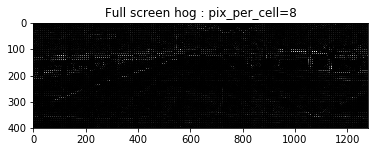

pix=8 (49, 159, 2, 2, 9)


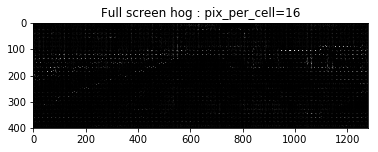

pix=16 (24, 79, 2, 2, 9)


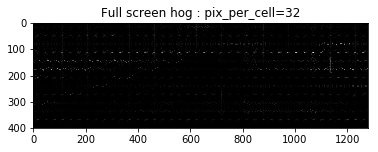

pix=32 (11, 39, 2, 2, 9)


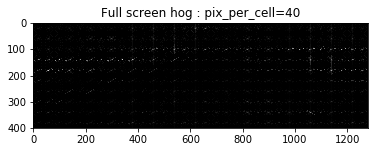

pix=40 (9, 31, 2, 2, 9)
Done


In [160]:
%matplotlib inline
from skimage.feature import hog

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
# whole screen HOG features
def get_color_space_image_channel(image, color_space, channel):
    
  
    if color_space != 'RGB':
        if color_space == 'HSV':
              feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)
    #print(feature_image)

    return feature_image[:,:,channel]

def get_full_screen_hog (image, pixsize, color_space='HLS', channel=1, visual=False) :
    #print('pixsize get full ', pixsize)
    #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) [320:] # cut half upper image (sky)
    gray= get_color_space_image_channel(image, color_space, channel)[320:]
    
    feature_array = hog(gray, orientations=orient, pixels_per_cell=(pixsize, pixsize),\
                    cells_per_block=(cell_per_block, cell_per_block), \
                    visualise=visual, feature_vector=False)

    #print (img.shape, 'featured=',feature_array.shape)
    return feature_array

orient = 9
pix_per_cell = 8
cell_per_block = 2
image = mpimg.imread('test_images/test1.jpg')
feature, hog_image = get_full_screen_hog(image, 8, 'HLS', 1, visual=True)
plt.figure()
plt.imshow(hog_image, cmap='gray')
plt.title('Full screen hog : pix_per_cell=8')
plt.show()
print('pix=8' ,feature.shape)


feature, hog_image = get_full_screen_hog(image, 16, visual=True)
plt.figure()
plt.imshow(hog_image, cmap='gray')
plt.title('Full screen hog : pix_per_cell=16')
plt.show()
print('pix=16' ,feature.shape)

feature, hog_image = get_full_screen_hog(image, 32, visual=True)
plt.figure()
plt.imshow(hog_image, cmap='gray')
plt.title('Full screen hog : pix_per_cell=32')
plt.show()
print('pix=32' ,feature.shape)

feature, hog_image = get_full_screen_hog(image, 40, visual=True)
plt.figure()
plt.imshow(hog_image, cmap='gray')
plt.title('Full screen hog : pix_per_cell=40')
plt.show()
print('pix=40' ,feature.shape)

print('Done')

## Cell 10 : Make model

In [ ]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import random
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split


# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='HLS', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True , flip=False):
    
    if(flip) : # random flip for 5 percent
        num=np.random.choice(20)
        if(num == 5) : # 5 percent : flip image
            image = make_image_flip(image)
                
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        #hangulo hangulo hangulo hangulo
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      
            


        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    


def return_num(num) :
    if(num==320) :
        return 0
    if(num==256) :
        return 1
    if(num==128) :
        return 2
    if(num==64) :
        return 3
    if(num==48) :
        return 4


# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='HLS', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True, hog_features=None):    
                                                # it can given full_hog_feature
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
       
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_features==None  : # if it has no hog feature.. then get from image  
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.extend(get_hog_features(feature_image[:,:,channel],                           
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                
       
        #8) Append features to list
        img_features.append(hog_features) 

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='HLS', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):
    global xy_windows
    
    full_screen_hog=[]
    for xwin,ywin in  (xy_windows) :
        #print('xwin=', xwin)
        hog_one = np.array(get_full_screen_hog(img,xwin//8, color_space, hog_channel)) # make 5 sized hogs
        full_screen_hog.append(hog_one)
        #print('out hog_one',hog_one.shape)
   

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        
        # change pix per cell
        pix_per_cell = (window[1][1]-window[0][1]) // 8
        #print('pix_per_cell=',pix_per_cell)
       
        
        if full_screen_hog != None : # get hog_features from full screen hog
            #print('windows=', window)
            hog_index_num = return_num(window[1][1]-window[0][1])
            #print('len (full_screen_hog) / hog index', len(full_screen_hog),hog_index_num)
            hog_one = full_screen_hog[hog_index_num]
            #print('shape of hog_one', hog_one.shape)
            
            #print ( 'window ',(window[0][1]-320),(window[1][1]-320) )
            # get hog_feature (window) from full_screen_hog_feature
            hog_feature = hog_one[ (window[0][1]-320) //pix_per_cell : (window[1][1]-320)//pix_per_cell-1
                                           , window[0][0]//pix_per_cell: window[1][0]//pix_per_cell-1 ]

            
            #print("shape of hog_features", hog_feature.shape)
            hog_features = hog_feature.ravel()
                
        else :
             hog_features = None
                
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat,
                            hog_features = hog_features #### ok, we can give hog features          
                                      )
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

## Cell 11 : Training Model

In [ ]:

    
random.seed(int(time.time()))

# Parameters ----------------------------------------------
color_space = 'HLS' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 1 # L channel # Can be 0, 1, 2, or "ALL" 
spatial_size = (32,32) #(16, 16) # Spatial binning dimensions
hist_bins = 32  #16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
#y_start_stop = [None, None] # Min and max in y to search in slide_window()
# Parameters ----------------------------------------------

# before training , modify the number of test sets, CAR/NOT CAR --> same number
not_car_size = len(notcars) # number images of not cars 
car_indices = np.arange(len(cars))  # get A test batch
np.random.shuffle(car_indices) # randomize
new_indices = car_indices[0:not_car_size]  # same with not car / cars
new_cars = np.array(cars)[new_indices]

print("Train! # of cars", len(new_cars) , "# of not cars", len(notcars))

car_features = extract_features(new_cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat, flip=True)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat , flip=False)

print('feature # =', len(car_features), 'not car features  # =', len(notcar_features))

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
print('# of X_train=', len(y_train), '# of y_train=', len(y_test))
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

print ("Done")

## Cell 12 : Model result test

test2_image/car01.jpg
test2_image/car02.jpg
test2_image/car03.jpg
test2_image/car04.jpg
test2_image/car05.jpg
test2_image/car06.jpg
test2_image/car07.jpg
test2_image/car08.jpg
test2_image/car09.jpg
test2_image/car10.jpg
test2_image/car11.jpg
test2_image/car_hangulo_01.jpg
test2_image/car_hangulo_02.jpg
test2_image/notcar01.jpg
test2_image/notcar02.jpg
test2_image/notcar03.jpg
test2_image/notcar04.jpg
done


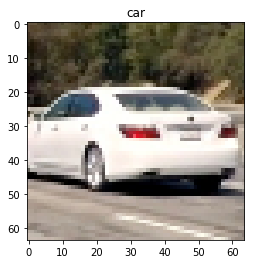

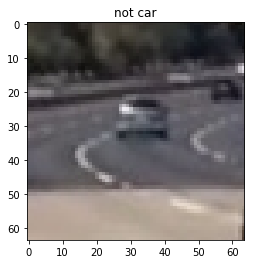

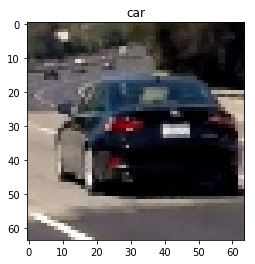

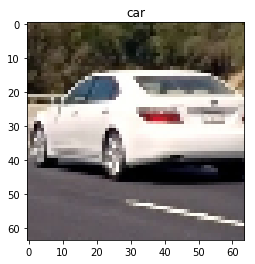

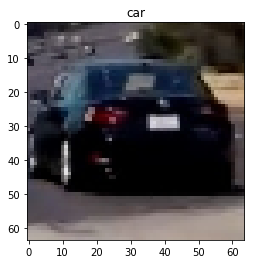

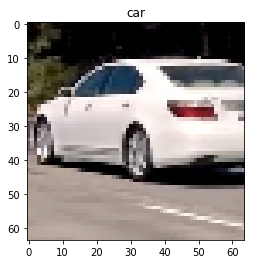

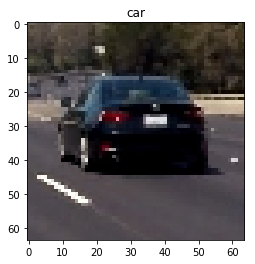

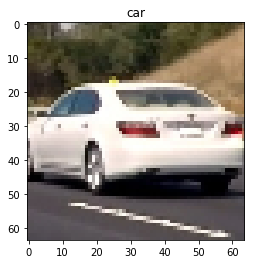

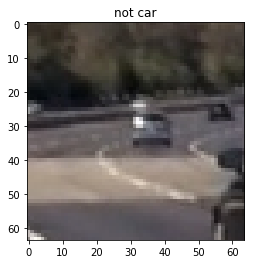

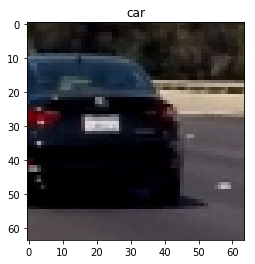

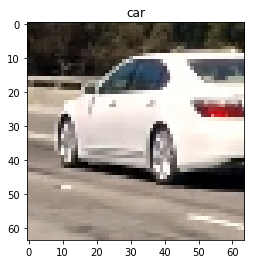

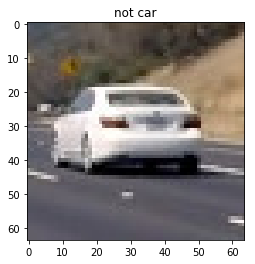

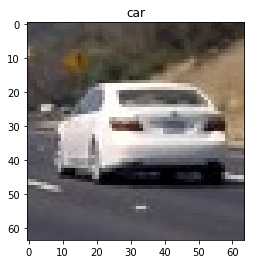

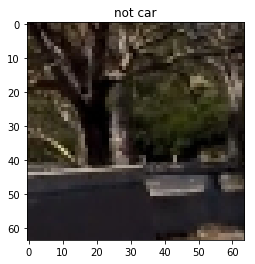

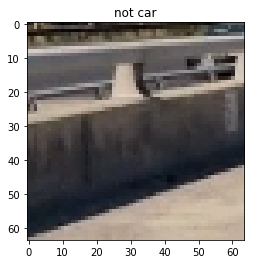

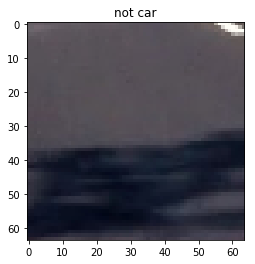

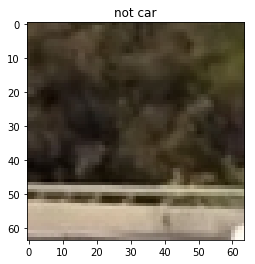

In [236]:
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


fnames = glob.glob('test2_image/*.jpg')  # test images
#print(fnames)
scaler = X_scaler
for fname in fnames :
    print(fname)
    image =  mpimg.imread(fname)
   
    test_img = cv2.resize(image, (64, 64))      
    features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
    test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
    prediction = svc.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        
    if prediction == 1:
        title = 'car'
    else :
        title= 'not car'
    plt.figure()
    plt.title(title)
    plt.imshow(test_img)

print('done')
        

## Cell 13 : Test detecting car 1 - using sliding window

Start!
Done


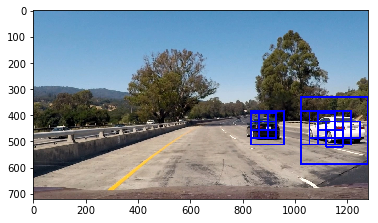

In [237]:
# test 

print('Start!')
image = mpimg.imread('test_images/test1.jpg')

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255



windows=[]        
for xy_window, xy_overlap, y_start_stop in zip (xy_windows, xy_overlaps, y_start_stops) :
    windows+= slide_window(image, x_start_stop=x_start_stops, y_start_stop= y_start_stop, 
                    xy_window=xy_window, xy_overlap=xy_overlap)

# get full screen hog features


# pix per cell will changed in function, pix_per_cell = window_size / 8 
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.figure()
plt.imshow(window_img)

print('Done')

#### Cell 14 : Multiple Detections & False Positives (One image)

2 cars found


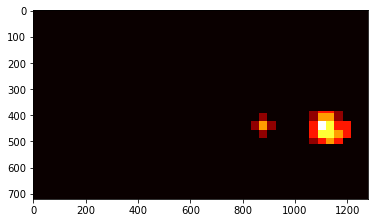

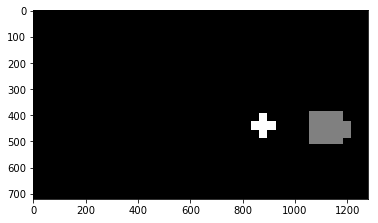

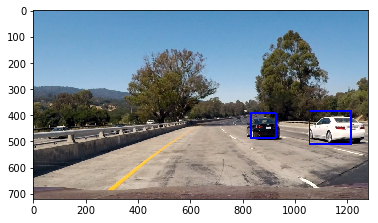

In [238]:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/de41bff0-ad52-493f-8ef4-5506a279b812

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.ndimage.measurements import label

# Read in the last image shown above 
#image = mpimg.imread('test_images/test3.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    
    # Return updated heatmap
    return heatmap

def minus_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] -= 1
    
    # Return updated heatmap
    return heatmap
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap


def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img



# for idx, boxlist in enumerate(hot_windows):
#     print(boxlist)
heatmap=add_heat(heat,hot_windows)
    
#print(hot_windows)
#heatmap=add_heat(heat,hot_windows)


#final_map = np.clip(heatmap - 2, 0, 255) 
final_map = np.clip(heatmap-2, 0, 255) # this is one frame, so don't minus
plt.figure()
plt.imshow(final_map, cmap='hot')

heatmap = apply_threshold(heatmap, 2) # threshold
labels = label(heatmap)
print(labels[1], 'cars found')
plt.figure()
plt.imshow(labels[0], cmap='gray')


# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)
# Display the image
plt.figure()
plt.imshow(draw_img)


## Cell 13 : Detect car test 2  (given test_images)
multiple images

filename= test_images/test1.jpg
filename= test_images/test2.jpg
filename= test_images/test3.jpg
filename= test_images/test4.jpg
filename= test_images/test5.jpg
filename= test_images/test6.jpg
filename= test_images/test_hangulo1.jpg


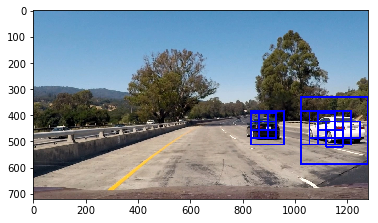

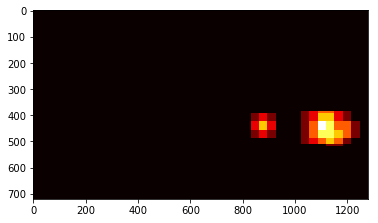

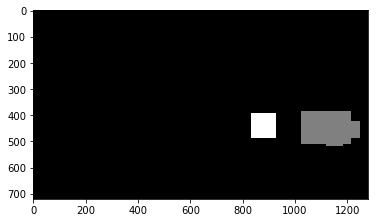

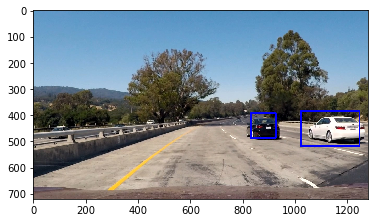

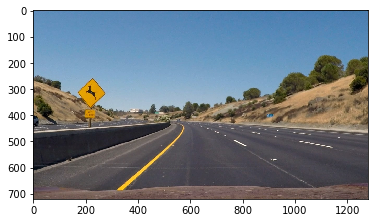

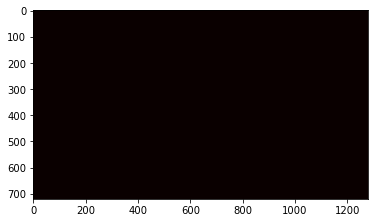

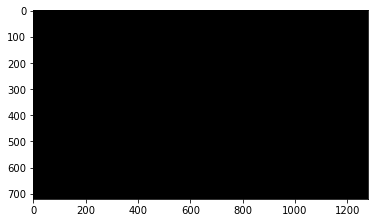

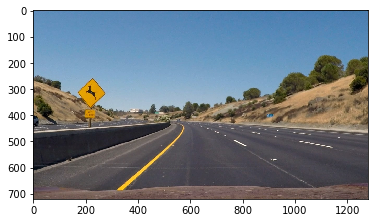

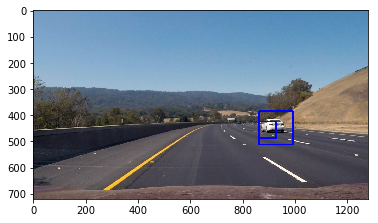

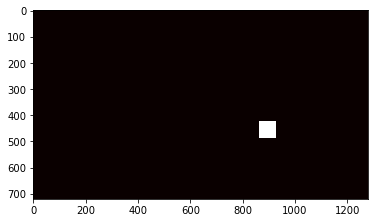

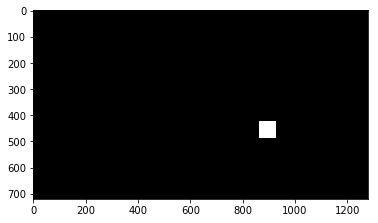

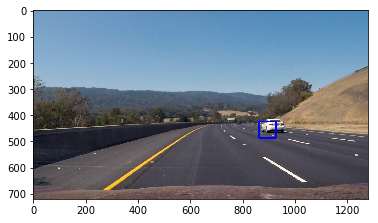

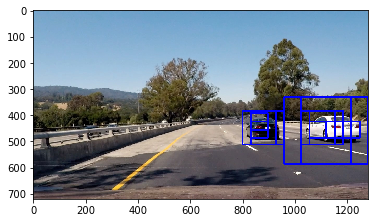

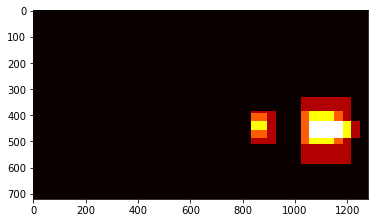

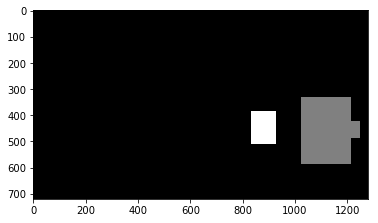

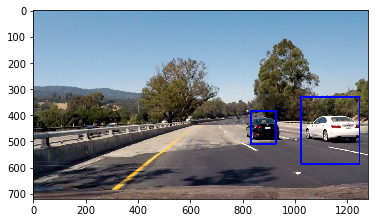

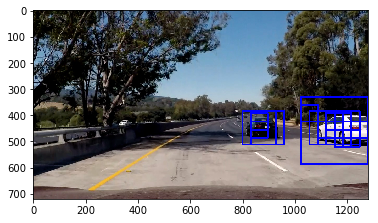

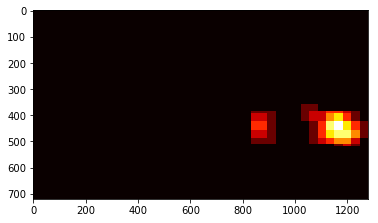

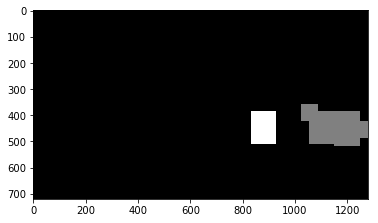

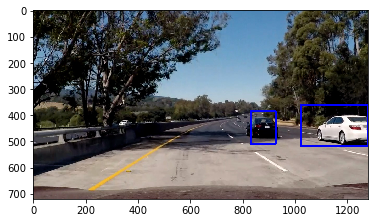

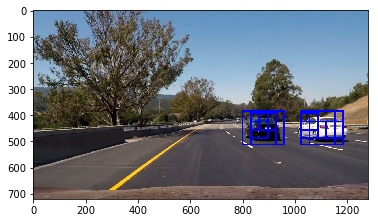

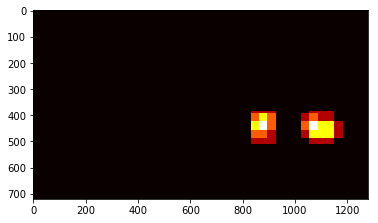

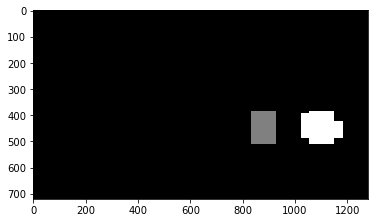

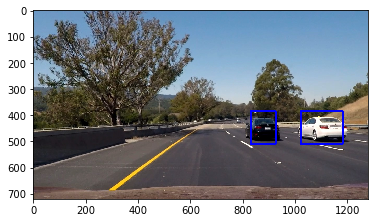

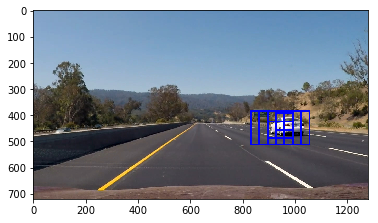

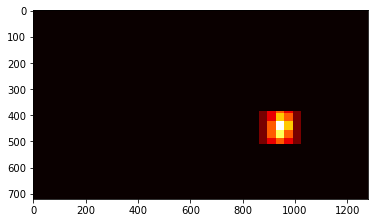

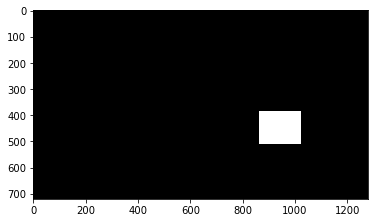

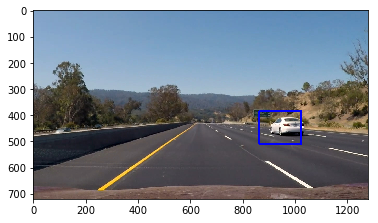

In [239]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

def process_vehicle_detection_image_pipeline(image, demo='True') :
    global x_start_stop
   
    draw_image = np.copy(image)

    windows=[]        
    for xy_window, xy_overlap, y_start_stop in zip (xy_windows, xy_overlaps, y_start_stops) :
        windows+= slide_window(image, x_start_stop=x_start_stops, y_start_stop= y_start_stop, 
                    xy_window=xy_window, xy_overlap=xy_overlap)
                    
    # windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
    #                     xy_window=(96, 96), xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    if(demo) :
        plt.figure()
        plt.imshow(window_img)
        
        
    # heat map
    
    

    # for idx, boxlist in enumerate(hot_windows):
    #     print(boxlist)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heatmap=add_heat(heat,hot_windows)

    if(demo) :
        final_map = np.clip(heatmap-1, 0, 255)
        plt.figure()
        plt.imshow(final_map, cmap='hot')

    heatmap = apply_threshold(heatmap, 1) # threshold
    labels = label(heatmap)
    
    if(demo) :
        plt.figure()
        plt.imshow(labels[0], cmap='gray')


    # Draw bounding boxes on a copy of the image
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    # Display the image
    
    if(demo) :
        plt.figure()
        plt.imshow(draw_img)
    
    return draw_img

# test process ############
# Read in our vehicles and non-vehicles
fnames = glob.glob('test_images/'+'*.*') # cars
for fname in fnames :
    print('filename=',fname)
    image = mpimg.imread(fname)
    ret_image = process_vehicle_detection_image_pipeline(image)
    
    

## Cell 14 : Video Pipeline

In [199]:

max_heat_num = 6 # how many frames check to determin car
global_threshold = 2
global_recent_hot_windows = [] # save recent heat (until max_heat_num)
global_last_heatmap = None
def process_vehicle_dectection_video_pipeline(image , demo=False) :
    global x_start_stop
    global global_last_heatmap
    global global_threshold
    global windows
   
    if(global_last_heatmap==None) :
        global_last_heatmap = np.zeros_like(image[:,:,0]).astype(np.float)  # make zero map
    

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
     
                                 hist_feat=hist_feat, hog_feat=hog_feat)   
    hot_windows_founded=False
    if(len(hot_windows)>0) :
        hot_windows_founded=True

    
    if(demo) : 
        draw_image = np.copy(image)
        f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(24, 9))
        
        if(hot_windows_founded) :
            window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)    
            f.tight_layout()
            ax1.imshow(window_img)
            #plt.title
    

    # for idx, boxlist in enumerate(hot_windows):
    #     print(boxlist)
    # if heat is first time
    # 1. get this time heat
    # 2. if recent_heat is morethan max_hit_num? then delete oldest one
    # 3. make heat map from recent_heat
    # 4. make final_map == threshold and apply label and draw boxes
      
   
    global_recent_hot_windows.append(hot_windows) # add this time hot_windows
    if(len(global_recent_hot_windows) > max_heat_num) : # if exceed max num
        if(len(global_recent_hot_windows[0])>0) :
            global_last_heatmap = minus_heat (global_last_heatmap, global_recent_hot_windows[0]) # remove hit number from last heatmap
        del global_recent_hot_windows[0]

    
    global_last_heatmap = add_heat (global_last_heatmap, hot_windows)
    global_last_heatmap = apply_threshold(global_last_heatmap, min(global_threshold,len(global_recent_hot_windows))) # threshold
    
    if demo :
        final_map = np.clip(global_last_heatmap, 0, 255)
        ax2.imshow(final_map, cmap='hot')
        ax2.set_title('Recent average heatmap')

    labels = label(global_last_heatmap)
        
    if(demo) :
        ax3.imshow(labels[0], cmap='gray')
        ax3.set_title("threshold = {:d}".format(min(global_threshold,len(global_recent_hot_windows))))

    # Draw bounding boxes on a copy of the image
    box_draw_img = draw_labeled_bboxes(image, labels)
    # Display the image
    if(demo) :
        ax4.imshow(box_draw_img)
        ax4.set_title("{:d} cars are founded".format( labels[1]))
        
    output_text = "{:d} cars are founded".format( labels[1])
    cv2.putText(box_draw_img, output_text, (100,100), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.5, color=(255,255,255), thickness=1)
   
    return box_draw_img

## Cell 15 : Detect car test 3 ( series of frames of video)
multiple images

filename= test_frames/video_000001.jpg
filename= test_frames/video_000002.jpg
filename= test_frames/video_000003.jpg
filename= test_frames/video_000004.jpg
filename= test_frames/video_000005.jpg
filename= test_frames/video_000006.jpg
filename= test_frames/video_000007.jpg
filename= test_frames/video_000008.jpg
filename= test_frames/video_000009.jpg


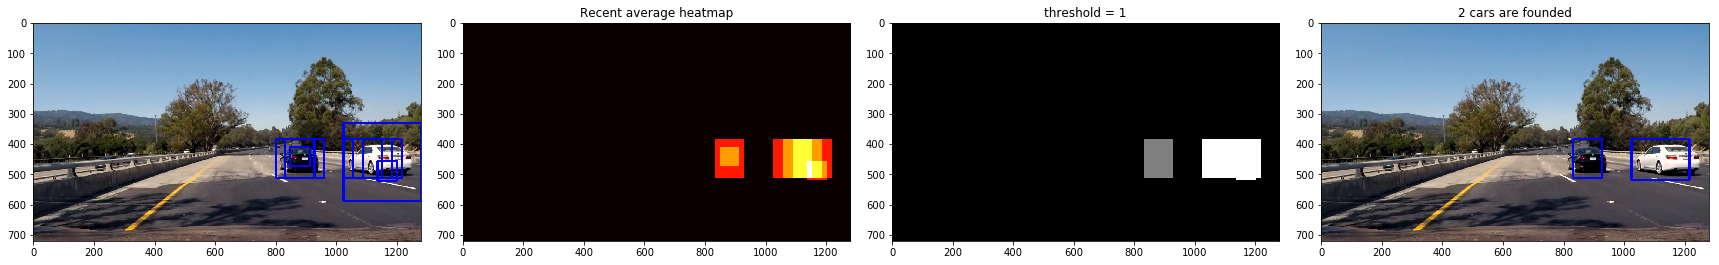

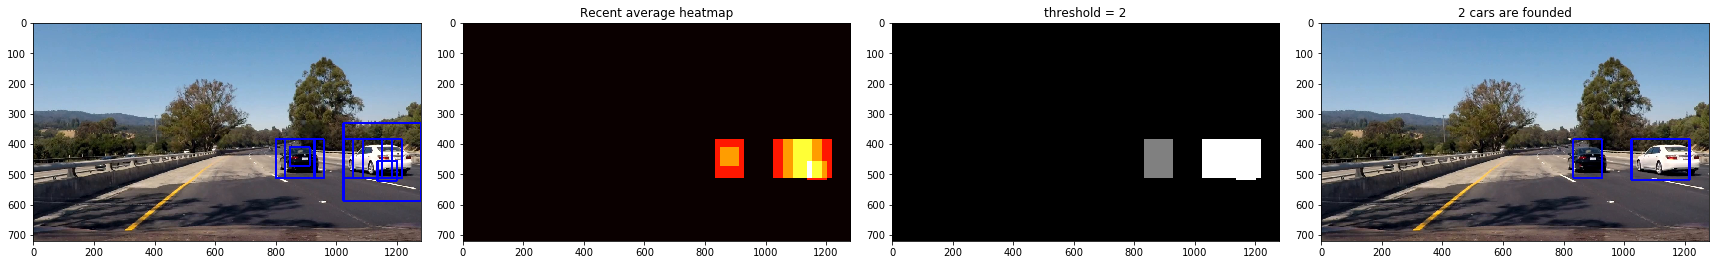

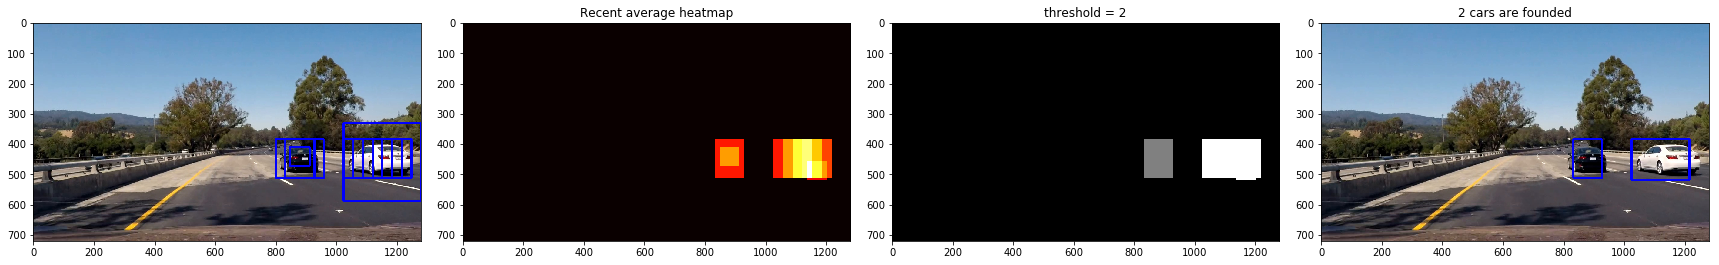

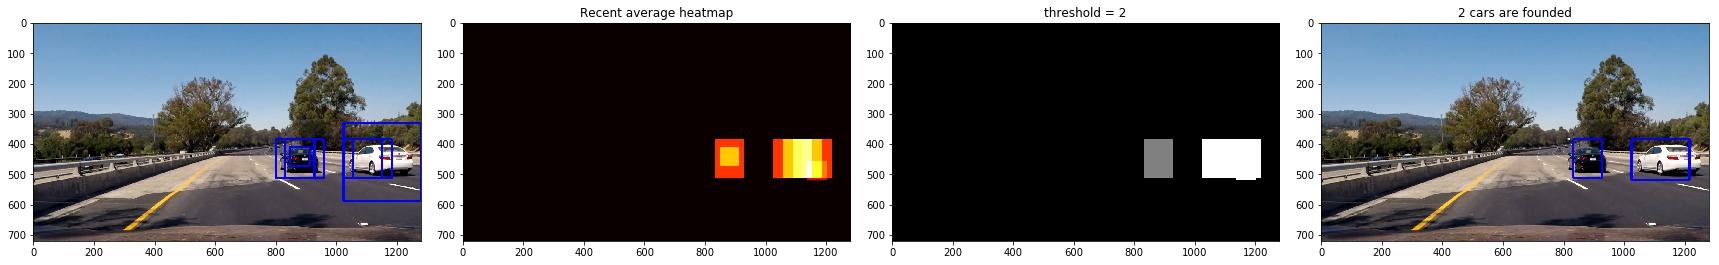

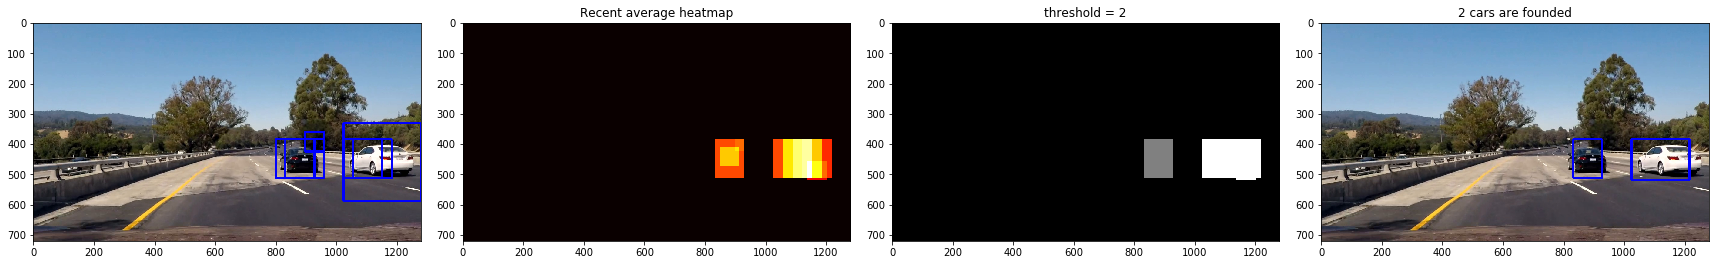

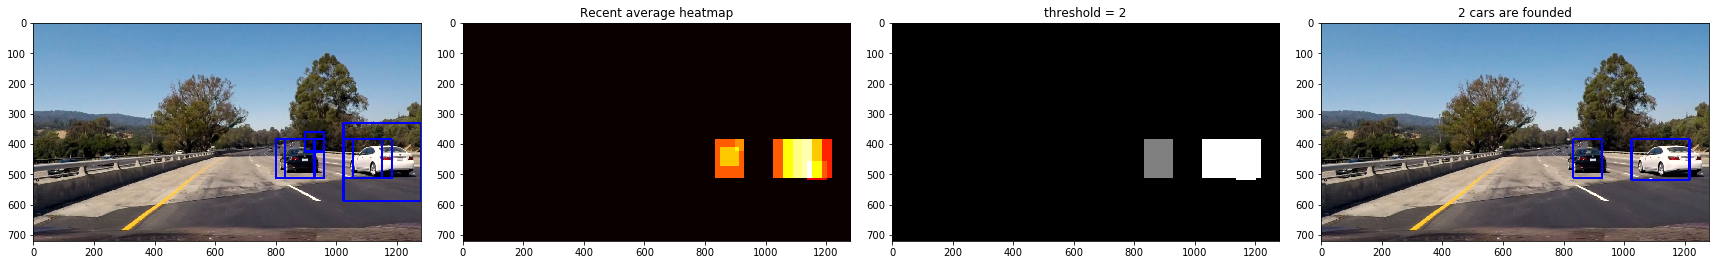

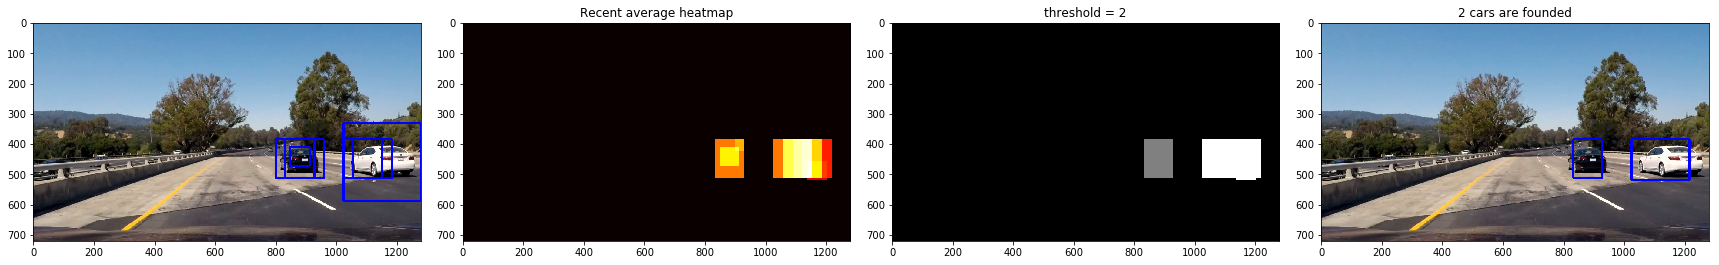

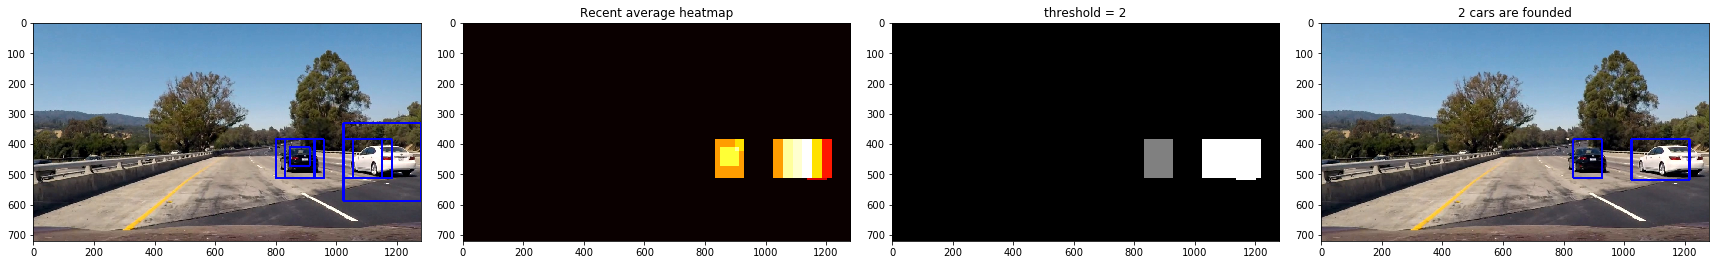

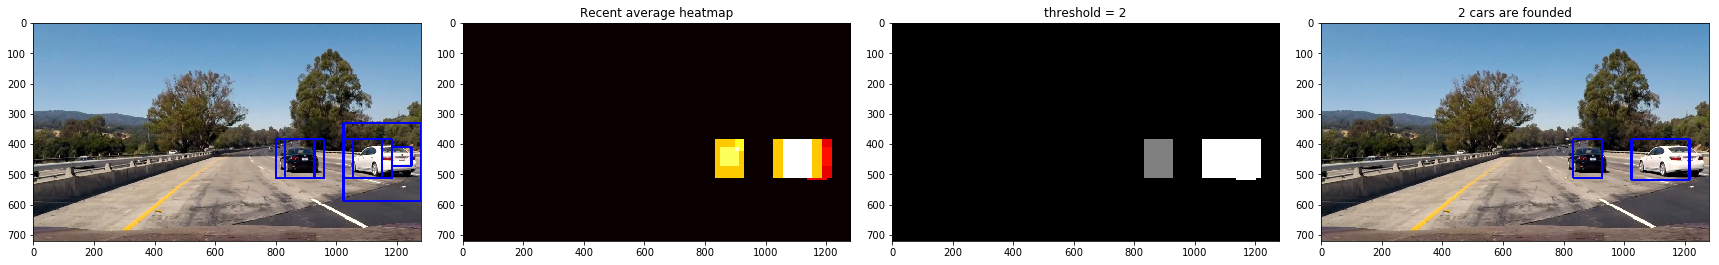

In [206]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
max_heat_num = 6 # how many frames check to determin car
global_threshold = 2
global_recent_hot_windows = [] # save recent heat (until max_heat_num)
global_last_heatmap = None
# test process ############
# Read in our vehicles and non-vehicles
fnames = glob.glob('test_frames/'+'*.*') # cars
for fname in fnames :
    print('filename=',fname)
    image = mpimg.imread(fname)
    ret_image = process_vehicle_dectection_video_pipeline(image, demo=True)

## Cell 16 : Test (Short video)
Before challenge project vidoe, test short version of project video


In [240]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

max_heat_num = 6 # how many frames check to determin car
global_threshold = 2
global_recent_hot_windows = [] # save recent heat (until max_heat_num)
global_last_heatmap = None

white_output = 'project_video_output_short.mp4'
clip1 = VideoFileClip("short2.mp4")
#global_mtx, global_dist = read_camera_calibration_from_file() #  Do camera calibration given object points and image points


white_clip = clip1.fl_image(process_vehicle_dectection_video_pipeline) 
%time white_clip.write_videofile(white_output, audio=False)

#Play the video inline, or if you prefer find the video in your filesystem 
#(should be in the same directory) and play it in your video player of choice.
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video_output_short.mp4
[MoviePy] Writing video project_video_output_short.mp4



  3%|▎         | 10/321 [00:05<02:36,  1.99it/s]
Exception in thread Thread-17:
Traceback (most recent call last):
  File "/Users/user02/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/user02/anaconda3/lib/python3.5/site-packages/tqdm/_tqdm.py", line 103, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/user02/anaconda3/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|█████████▉| 320/321 [02:45<00:00,  1.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_short.mp4 

CPU times: user 4min 6s, sys: 11.4 s, total: 4min 18s
Wall time: 2min 47s


## Cell 16 : Project Video

In [241]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

max_heat_num = 6 # how many frames check to determin car
global_threshold = 2
global_recent_hot_windows = [] # save recent heat (until max_heat_num)
global_last_heatmap = None

white_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
#global_mtx, global_dist = read_camera_calibration_from_file() #  Do camera calibration given object points and image points


white_clip = clip1.fl_image(process_vehicle_dectection_video_pipeline) 
%time white_clip.write_videofile(white_output, audio=False)

#Play the video inline, or if you prefer find the video in your filesystem 
#(should be in the same directory) and play it in your video player of choice.
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [13:39<00:00,  1.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 17min 12s, sys: 55.6 s, total: 18min 7s
Wall time: 13min 40s


## below routine is get multiple frame from video. only for testing 

In [199]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

i=0
def saveonly(image) :
    global i
    i=i+1
    if(i<10) :
        img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.imwrite("video_{:06d}.jpg".format(i), img2)
    return image

white_output = 'veryshort_output.mp4'
clip1 = VideoFileClip("very_short2.mp4")
#global_mtx, global_dist = read_camera_calibration_from_file() #  Do camera calibration given object points and image points


white_clip = clip1.fl_image(saveonly) 
%time white_clip.write_videofile(white_output, audio=False)

#Play the video inline, or if you prefer find the video in your filesystem 
#(should be in the same directory) and play it in your video player of choice.
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video veryshort_output.mp4
[MoviePy] Writing video veryshort_output.mp4


 92%|█████████▏| 12/13 [00:00<00:00, 29.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: veryshort_output.mp4 

CPU times: user 287 ms, sys: 95 ms, total: 382 ms
Wall time: 970 ms
